***T5 Data Science Bootcamp***
# Predicting Video Games Global Sales (MVP)

By Nouf Alotaibi
<br>
Email: noufmitla@gmail.com


### Table of Contents
- [Introduction](#Introduction)
- [Part I - Load Dataset](#LoadDataset)
- [Part II - Split Data](#SplitData)
- [Part III - Linear Regression Baseline Model](#LinearRegression)

## Introduction

In this project, I will be investigating the relationship between the global sales of games and user/critic scores to predict the games' global sales and success. Also, test the effect of global sales on the game's play score, publisher, developer, genre, and other features. Moreover, I will get familiar with Machine Learning, web scraping techniques, and modeling methods such as Linear Regression and other Regression algorithems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
games_df = pd.read_csv("data/games_original", sep="@").iloc[:, 1:]
games_df.head()

,rank,game_name,platform,genre,global_sales,publisher,developer,release_date,critics_rating,num_critics_rating,users_rating,num_users_rating,rate,year,play_score
0,17,Grand Theft Auto V,PlayStation 3,Action,21400000.0,Rockstar Games,Rockstar North,2013-09-17,97,50,8.3,4719,M,2013,9.28
1,24,Grand Theft Auto V,Xbox 360,Action,16380000.0,Rockstar Games,Rockstar North,2013-09-17,97,58,8.3,3990,M,2013,9.63
2,30,Call of Duty: Modern Warfare 3,Xbox 360,Shooter,14760000.0,Activision,Infinity Ward,2011-11-08,88,81,3.5,8631,M,2011,8.53
3,32,Call of Duty: Black Ops,Xbox 360,Shooter,14640000.0,Activision,Treyarch,2010-11-09,87,89,6.6,1662,M,2010,8.41
4,35,Call of Duty: Black Ops II,PlayStation 3,Shooter,14030000.0,Activision,Treyarch,2012-11-13,83,21,5.7,1116,M,2012,7.84


## Split Data

In [3]:
# Separate the target and the features
cat_columns = ['global_sales','game_name','platform','genre','publisher','developer','release_date','rate']
X = games_df.drop(columns=cat_columns, axis=1)
y = games_df['global_sales'] # 

In [4]:
# Split data into 60% train, 20% validation, and 20% test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

## Linear Regression Baseline Model

In [7]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f"Training Score: {round(lm.score(X_train, y_train), 6)}")
print(f"Validation Score: {round(lm.score(X_val, y_val), 6)}")

Training Score: 0.385292
Validation Score: 0.448502


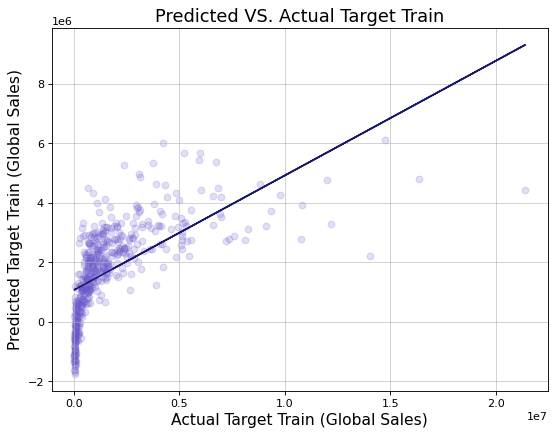

In [8]:
y_train_pred = lm.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)